In [ ]:
!pip install -q scikit-learn pandas


In [ ]:
import zipfile
import os

# Path to zip file
zip_path = "/content/archive (2).zip"

# Destination folder
extract_to = "/content/"

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ Unzipped successfully!")


✅ Unzipped successfully!


In [ ]:
# Path to your uploaded zip file
zip_path = "/content/archive (3).zip"

# Destination folder
extract_to = "/content/"

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("✅ Unzipped successfully!")

✅ Unzipped successfully!


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 1. Load Data
intern_df = pd.read_csv('/content/internships.csv')
# Combine all 'Skill' columns into a single 'skills' column
skill_columns = [col for col in intern_df.columns if col.startswith('Skill')]
intern_df['skills'] = intern_df[skill_columns].fillna('').agg(' '.join, axis=1)
intern_df = intern_df[['skills']].dropna()
intern_df['intern_id'] = intern_df.index

industry_df = pd.read_csv('/content/job_descriptions.csv')
industry_df = industry_df[['Job Description']].dropna()
industry_df['job_id'] = industry_df.index
industry_df.columns = ['job_description', 'job_id']


# 2. Combine All Skill Texts for TF-IDF
combined_skills = pd.concat([intern_df['skills'], industry_df['job_description']], ignore_index=True)

# 3. Vectorization using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(combined_skills)

# 4. Split Vectors Back
intern_tfidf = tfidf_matrix[:len(intern_df)]
industry_tfidf = tfidf_matrix[len(intern_df):]

# 5. Cluster Industry Skills to Create "Job Skill Profiles"
n_clusters = 5  # you can tune this
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto')
kmeans.fit(industry_tfidf)
industry_clusters = kmeans.predict(industry_tfidf)

# 6. Match Each Intern to Closest Industry Cluster Center
intern_clusters = cosine_similarity(intern_tfidf, kmeans.cluster_centers_)
intern_best_fit = np.argmax(intern_clusters, axis=1)

# 7. Identify Skill Gaps
# For each intern, compare their skills vector to cluster center
def get_top_missing_skills(intern_vec, cluster_center, feature_names, top_n=5):
    diff = cluster_center - intern_vec
    missing_indices = diff.argsort()[::-1][:top_n]
    return [feature_names[i] for i in missing_indices if diff[i] > 0]

feature_names = vectorizer.get_feature_names_out()

skill_gap_results = []

for i in range(len(intern_df)):
    intern_vec = intern_tfidf[i].toarray().flatten()
    cluster_center = kmeans.cluster_centers_[intern_best_fit[i]]
    missing_skills = get_top_missing_skills(intern_vec, cluster_center, feature_names)
    skill_gap_results.append({
        'intern_id': intern_df.iloc[i]['intern_id'],
        'suggested_skills': missing_skills
    })

# 8. Results as DataFrame
result_df = pd.DataFrame(skill_gap_results)
print(result_df)

# 9. Save Output
result_df.to_csv("intern_skill_gap_analysis.csv", index=False)

     intern_id                                   suggested_skills
0            0     [insights, financial, making, analyze, market]
1            1       [data, insights, financial, making, analyze]
2            2       [data, insights, financial, making, analyze]
3            3       [data, insights, financial, making, analyze]
4            4       [insights, data, financial, making, analyze]
..         ...                                                ...
223        223     [insights, financial, making, analyze, market]
224        224       [data, insights, financial, making, analyze]
225        225  [network, security, performance, customer, sys...
226        226                 [legal, care, ensure, design, tax]
227        227  [network, security, performance, customer, sys...

[228 rows x 2 columns]


In [ ]:
!pip install wordcloud


**Top Most Frequently Missing Skills**

/tmp/ipython-input-9-800445661.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(skills), palette="viridis")


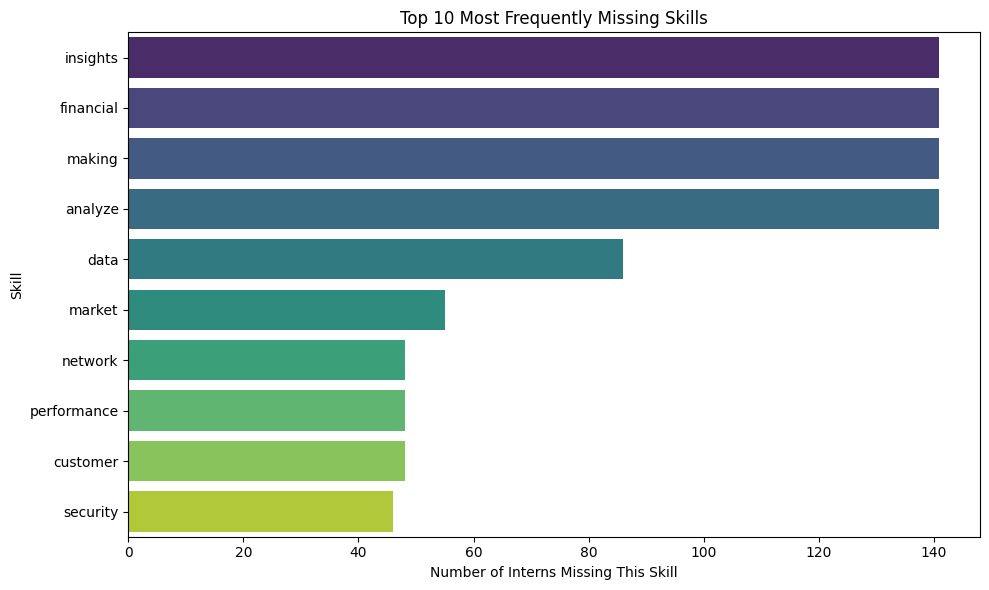

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten the list of all suggested skills
all_skills = [skill for sublist in result_df['suggested_skills'] for skill in sublist]

# Count frequency
skill_counts = Counter(all_skills)
top_skills = skill_counts.most_common(10)  # Top 10

# Plot
skills, counts = zip(*top_skills)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(skills), palette="viridis")
plt.title("Top 10 Most Frequently Missing Skills")
plt.xlabel("Number of Interns Missing This Skill")
plt.ylabel("Skill")
plt.tight_layout()
plt.show()

**View Skill Gaps for a Specific Intern**

In [ ]:
target_intern_id = 10

target_skills = result_df[result_df['intern_id'] == target_intern_id]['suggested_skills'].values

if target_skills:
    print(f"Suggested skills for Intern {target_intern_id}:\n", target_skills[0])
else:
    print("Intern ID not found.")

Suggested skills for Intern 10:
 ['legal', 'care', 'ensure', 'design', 'tax']


**Word Cloud**

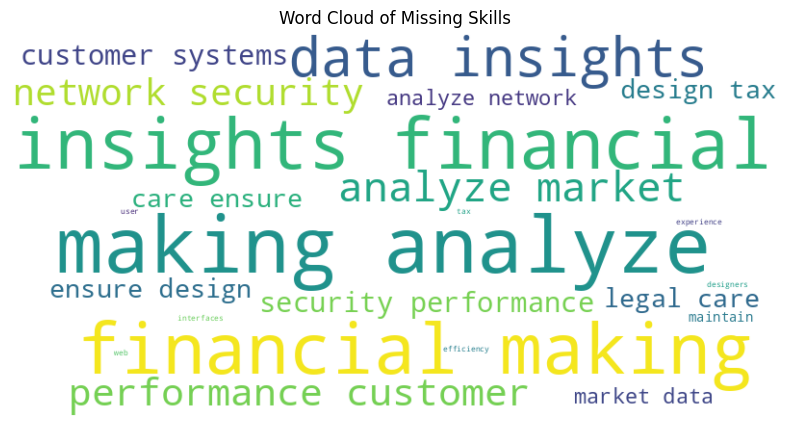

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(all_skills))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Missing Skills")
plt.show()


**suggest training**

In [ ]:
# Define training suggestions for top skills
training_resources = {
    'python': 'https://www.coursera.org/specializations/python',
    'data': 'https://www.udemy.com/course/data-science-and-machine-learning-bootcamp/',
    'machine': 'https://www.coursera.org/learn/machine-learning',
    'sql': 'https://www.codecademy.com/learn/learn-sql',
    'financial': 'https://www.edx.org/course/introduction-to-corporate-finance',
    'cloud': 'https://www.coursera.org/specializations/cloud-computing',
    'network': 'https://www.udemy.com/course/networking-fundamentals/',
    'security': 'https://www.coursera.org/specializations/it-security',
    'communication': 'https://www.coursera.org/learn/wharton-communication-skills',
    'analyze': 'https://www.udemy.com/course/data-analytics-real-world-projects/'

}


In [ ]:
# Add a new column to your existing result DataFrame
def suggest_training(skills):
    return [training_resources.get(skill, "No course found") for skill in skills]

# Apply to your DataFrame
result_df['training_links'] = result_df['suggested_skills'].apply(suggest_training)

In [ ]:
print(result_df[['intern_id', 'suggested_skills', 'training_links']].head())

   intern_id                                suggested_skills  \
0          0  [insights, financial, making, analyze, market]   
1          1    [data, insights, financial, making, analyze]   
2          2    [data, insights, financial, making, analyze]   
3          3    [data, insights, financial, making, analyze]   
4          4    [insights, data, financial, making, analyze]   

                                      training_links  
0  [No course found, https://www.edx.org/course/i...  
1  [https://www.udemy.com/course/data-science-and...  
2  [https://www.udemy.com/course/data-science-and...  
3  [https://www.udemy.com/course/data-science-and...  
4  [No course found, https://www.udemy.com/course...  


**Save Enhanced CSV**

In [ ]:
result_df.to_csv("intern_skill_gap_with_training.csv", index=False)